# Artificial and Computational Intelligence Assignment 1


# PS 1-2 : Grid Navigation Agent

Assume you are in your office in Nellore in Andhra Pradesh. The city is facing heavy rains due to Cyclone Michaung. Most of the areas are inundated with water. You need to reach home safely. You have a navigation agent which you can use to find the safe routes without water. The agent is fed with the map of the city marked with areas of flood. The agent has to find the route that is the safest to take you home by choosing the next grid considering different factors. 5 points to be added each time the agent passes adjacent (Up, Down, Left, Right) safe places and 5 points to be deducted while the agent passes near water bodies and 3 points to be deducted if roads in the area are flooded with water.

The following figure gives the initial grid positions. The desired solution must have maximum points but must have travelled through less number of squares. The environment is fully observable. The agent travels on empty cells and the water bodies and flooded areas are marked as blockades. You cannot travel through them, but can travel adjacent to these cells. No diagonal movements are allowed.


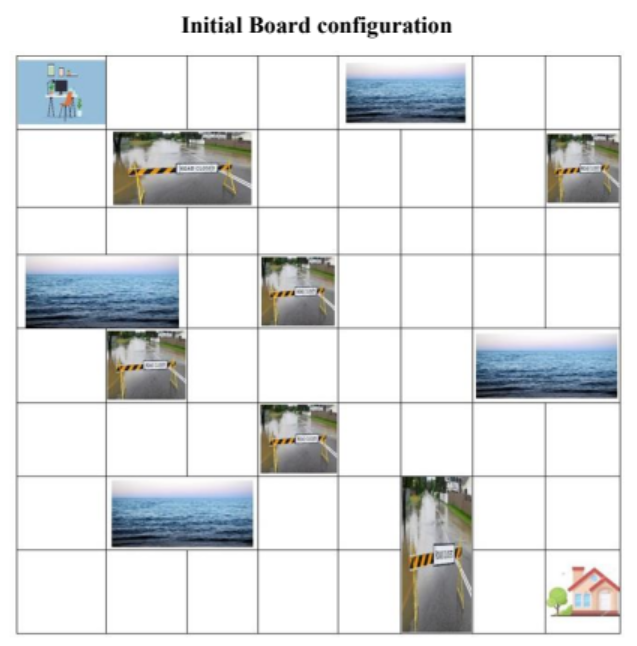


Answer the following:

1. Explain the environment of the agent [20% weightage]
2. Define the heuristic and or fitness function for the given algorithms and the given problem. [20% weightage]
3. Use appropriate data structures and implement given informed and local search algorithm and Print the path taken by the agent to reach home. [40% weightage]
4. Find and print space and time complexity using code in your implementation. [20% weightage]

Note:

- You are provided with the python notebook template which stipulates the structure of code and documentation. Use well intended python code.
- Use separate MS word document for explaining the theory part. Do not include theory part in the Python notebook except Python comments.
- The implementation code must be completely original and executable.
- Please keep your work (code, documentation) confidential. If your code is found to be plagiarized, you will be penalized severely. Parties involved in the copy will be considered equal partners and will be penalized severely


## Problem solving by Uninformed & Informed Search


Things to follow

1. Use appropriate data structures to represent the graph and the path using python libraries
2. Provide proper documentation
3. Find the path and print it


Coding begins here


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np

### 1. Define the environment in the following block


List the PEAS description of the problem here in this markdown block

- Performance (P)
  - +5 points each time agent passes adjacent **safe places**
  - -5 points while agent passes near **water bodies**
  - -3 points if roads in area are **flooded** with water
- Environment (E)
  - Grid
- Actuators (A)
  - Up
  - Down
  - Left
  - Right
- Sensors (S)
  - agent can sense nearby/ adjacent areas


Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below


In [3]:
import enum


class BlockType(enum.IntEnum):
    SAFE = +5
    WATER_BODY = -5
    ROAD_FLOODED = -3

    AGENT_PATH = 0
    AGENT_CURRENT = 1
    GOAL = 2


block_cmap = {
    BlockType.SAFE: "white",
    BlockType.WATER_BODY: "blue",
    BlockType.ROAD_FLOODED: "brown",
    BlockType.AGENT_PATH: "lightgreen",
    BlockType.AGENT_CURRENT: "green",
    BlockType.GOAL: "red",
}


class Action(enum.IntEnum):
    Up = 1
    Down = 2
    Left = 3
    Right = 4

In [4]:
# display the grid for visual representation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm


def display_state(
    grid: np.ndarray,
    agent_pos: tuple,
    goal_pos: tuple,
    path: list,
):
    state = grid.copy()

    sorted_keys = sorted(block_cmap.keys())
    sorted_colors = [block_cmap[key] for key in sorted_keys]

    cmap = ListedColormap(sorted_colors)
    norm = BoundaryNorm(
        sorted_keys + [max(sorted_keys) + 1],
        ncolors=len(sorted_colors),
        clip=True,
    )

    if path:
        for e in path:
            state[e] = BlockType.AGENT_PATH

    if agent_pos:
        state[agent_pos] = BlockType.AGENT_CURRENT

    if goal_pos:
        state[goal_pos] = BlockType.GOAL

    plt.figure()
    plt.imshow(
        state,
        cmap=cmap,
        norm=norm,
        interpolation="nearest",
    )

    plt.colorbar()
    plt.title("State")
    plt.show()

agent: (0, 0)
goal: (7, 7)
[[ 5  5  5  5 -5 -5  5  5]
 [ 5 -3 -3  5  5  5  5 -3]
 [ 5  5  5  5  5  5  5  5]
 [-5 -5  5 -3  5  5  5  5]
 [ 5 -3  5  5  5  5 -5 -5]
 [ 5  5  5 -3  5  5  5  5]
 [ 5 -5 -5  5  5 -3  5  5]
 [ 5  5  5  5  5 -3  5  5]]


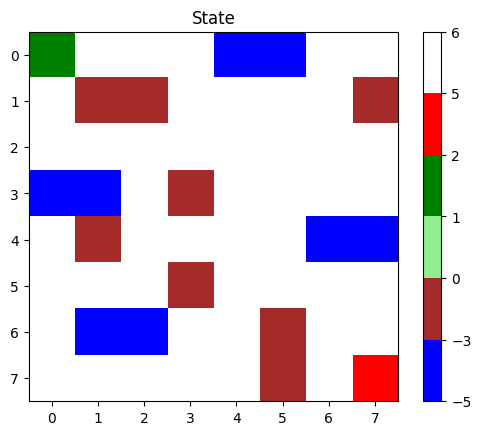

In [5]:
# Code Block : Set Initial State (Must handle dynamic inputs)

GRID = np.array(
    [
        [
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.WATER_BODY,
            BlockType.WATER_BODY,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
        [
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
        ],
        [
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
        [
            BlockType.WATER_BODY,
            BlockType.WATER_BODY,
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
        [
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.WATER_BODY,
            BlockType.WATER_BODY,
        ],
        [
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
        [
            BlockType.SAFE,
            BlockType.WATER_BODY,
            BlockType.WATER_BODY,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
        [
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.SAFE,
            BlockType.ROAD_FLOODED,
            BlockType.SAFE,
            BlockType.SAFE,
        ],
    ]
)

AGENT_INIT_POS = (0, 0)
GOAL_POS = (7, 7)

print("agent:", AGENT_INIT_POS)
print("goal:", GOAL_POS)

print(GRID)

display_state(GRID, AGENT_INIT_POS, GOAL_POS, [])

[[10  7  7  5  0  0  5  2]
 [ 7  0  0 12 10 10 12  0]
 [ 5  2 12 12 20 20 20  7]
 [ 0  0  2  0 12 20 10  5]
 [-3  0 12  4 20 10  0  0]
 [15  2  2  0 12 12 10  5]
 [ 5  0  0  2 12  0 12 15]
 [10  5  5 15  7  0  7 10]]


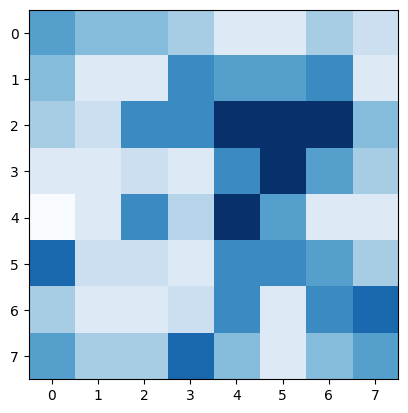

In [6]:
# Code Block : Set the matrix for transition & cost
# (as relevant for the given problem)3

step_cost_matrix = np.zeros_like(GRID)

for i in range(GRID.shape[0]):
    for j in range(GRID.shape[1]):
        # we dont need step cost for blocks where we cant go
        if GRID[i, j] != BlockType.SAFE:
            continue

        t = 0 if i == 0 else GRID[i - 1, j]
        b = 0 if i == GRID.shape[0] - 1 else GRID[i + 1, j]

        l = 0 if j == 0 else GRID[i, j - 1]
        r = 0 if j == GRID.shape[1] - 1 else GRID[i, j + 1]

        step_cost_matrix[i, j] = t + b + l + r

print(step_cost_matrix)


plt.figure()
plt.imshow(step_cost_matrix, cmap="Blues")
plt.show()

In [7]:
# Code Block : Write function to design the
# Transition Model/Successor function.
# Ideally this would be called while search algorithms are implemented


def transition(grid: np.ndarray, pos: tuple):
    actions = set()

    if pos[1] > 0 and grid[pos[0], pos[1] - 1] == BlockType.SAFE:
        actions.add(Action.Left)

    if pos[1] < grid.shape[1] - 1 and grid[pos[0], pos[1] + 1] == BlockType.SAFE:
        actions.add(Action.Right)

    if pos[0] > 0 and grid[pos[0] - 1, pos[1]] == BlockType.SAFE:
        actions.add(Action.Up)

    if pos[0] < grid.shape[0] - 1 and grid[pos[0] + 1, pos[1]] == BlockType.SAFE:
        actions.add(Action.Down)

    return actions

In [8]:
# Code block : Write function to handle goal
# test (Must handle dynamic inputs).
# Ideally this would be called while search algorithms are implemented


def check_goal(curr_agent_pos: tuple):
    return curr_agent_pos == GOAL_POS

### 2. Definition of Algorithms


#### A\*


### DYNAMIC INPUT


IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.


In [9]:
# Code Block : Function & call to get inputs (start/end state)

### 4. Calling the search algorithms

(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)


In [10]:
# Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

In [11]:
# Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

### 5. Comparitive Analysis


In [12]:
# Code Block : Print the Time & Space complexity of algorithm 1

In [13]:
# Code Block : Print the Time & Space complexity of algorithm 2

### 6. Provide your comparitive analysis or findings in no more than 3 lines in below section


Comparison : \***\*\*\*\*\***\*\*\***\*\*\*\*\***\_\_\_\***\*\*\*\*\***\*\*\***\*\*\*\*\***

---

---
